# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [149]:
%matplotlib inline

In [356]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Merge_df= pd.merge(mouse_metadata, study_results,how="left", on="Mouse ID")

# Display the data table for preview
Merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [76]:
#Number of unique mouse
mouse_count= Merge_df['Mouse ID'].unique()
count=len(mouse_count)
count

249

In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [77]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [78]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = Merge_df.loc[Merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate


array(['g989'], dtype=object)

In [79]:
# Optional: Get all the data for the duplicate mouse ID. 
optional = Merge_df.loc[Merge_df["Mouse ID"] == "g989", :]
optional


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = Merge_df[~Merge_df['Mouse ID'].isin(duplicate)]

cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
mdt=cleaned_df["Mouse ID"].value_counts()
mdtf=len(mdt)
mdtf

248

## Summary Statistics

In [81]:

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
df = Merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
stats =df.agg(['mean', 'median', 'var', 'std', 'sem'])
# Assemble the resulting series into a single summary DataFrame.
stats_df=pd.DataFrame(stats)
stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
#Rename Columns to match example
stats_df.rename(columns={"mean": "Mean Tumor Volume"}, inplace=True)
stats_df.rename(columns={"median": "Median Tumor Volume"}, inplace=True)
stats_df.rename(columns={"var": "Tumor Volume Variance"}, inplace=True)
stats_df.rename(columns={"std": "Tumor Volume Std. Dev."}, inplace=True)
stats_df.rename(columns={"sem": "Tumor Volume Std. Err."}, inplace=True)
stats_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [89]:
#long way
mean=Merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=Merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=Merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std=Merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err=Merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

stats2_df= pd.DataFrame({"Mean":mean, "Median": median, "Var": variance, "Std": std, "Std Err": std_err})
stats2_df





,Mean,Median,Var,Std,Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [180]:
#get unqe values of regiment cont
regimen_counts = Merge_df['Drug Regimen'].value_counts()
regimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

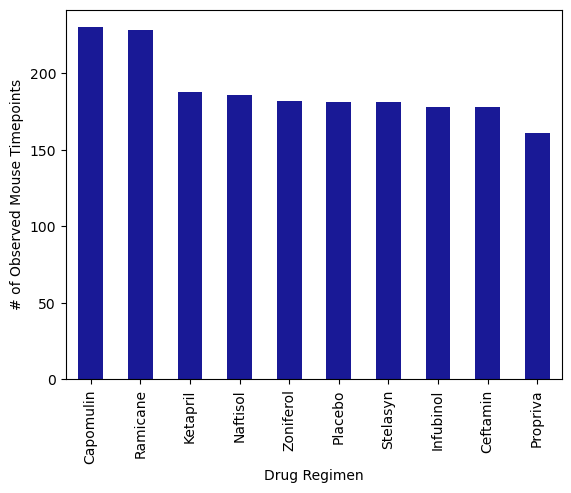

In [181]:
#plot the count using a bar graph using matplotlib.pyplot
regimen_counts.plot(kind='bar', color='darkblue', alpha=0.9)
#label the x and y axis
plt.title('')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

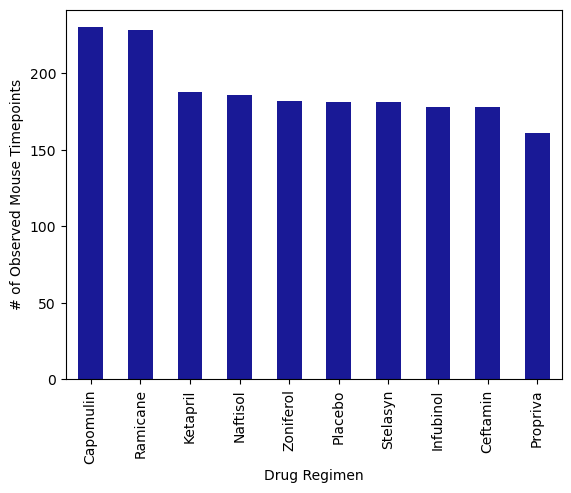

In [110]:
#create a bar graph using theDataFrame.plot()
method2 = regimen_counts.plot(kind='bar', color='darkblue', alpha=0.9)
method2.set_xlabel('Drug Regimen')
method2.set_ylabel('# of Observed Mouse Timepoints')
plt.show()


In [197]:
f_vs_m=cleaned_df.groupby('Sex')['Sex'].value_counts()
f_vs_m
list=f_vs_m.to_list()
print(list)

[922, 958]


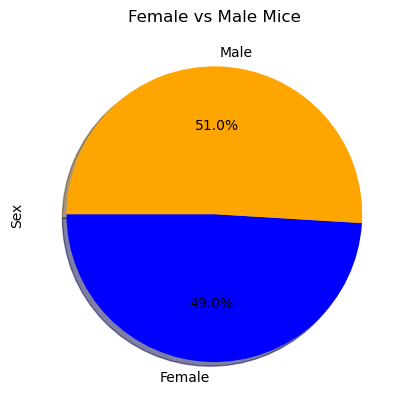

In [199]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Pulling the necessary data
f_vs_m=cleaned_df.groupby('Sex')['Sex'].value_counts()
# Labels for the sections of our pie chart
gender = ["Female","Male"]

# The values of each section of the pie chart
distribution= [922, 958]


# The colors of each section of the pie chart
colors = ["blue", "orange"]
# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(distribution, explode=explode, labels=gender, colors=colors,
        autopct= "%1.1f%%", shadow=True, startangle=180)
plt.title('Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

#ho do I round to the show.0?

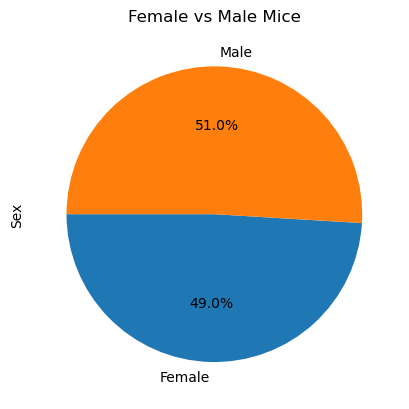

In [280]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas (.plot)
f_vs_m=cleaned_df.groupby('Sex')['Sex'].value_counts()
method3=f_vs_m.plot.pie(autopct= "%1.1f%%", startangle=180)
plt.title('Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [203]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [291]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
tp= cleaned_df.groupby("Mouse ID")['Timepoint'].max()
tp_df=pd.DataFrame(tp)
tp_df
#merge the clean dr to the tp_df
merge_df2=pd.merge(tp_df,cleaned_df, on="Mouse ID", how="left")

#rename duplicate columns

merge_df2.rename(columns={"Timepoint_x": "Greatest Timepoint"}, inplace=True)
merge_df2.rename(columns={"Timepoint_y": "Timepoint"}, inplace=True)
merge_df2


,Mouse ID,Greatest Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,0,45.000000,0
1,a203,45,Infubinol,Female,20,23,5,48.508468,0
2,a203,45,Infubinol,Female,20,23,10,51.852437,1
3,a203,45,Infubinol,Female,20,23,15,52.777870,1
4,a203,45,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...,...
1875,z969,45,Naftisol,Male,9,30,25,63.145652,2
1876,z969,45,Naftisol,Male,9,30,30,65.841013,3
1877,z969,45,Naftisol,Male,9,30,35,69.176246,4
1878,z969,45,Naftisol,Male,9,30,40,70.314904,4


In [292]:
# Put treatments into a list for a for loop (and later for plot labels)
Treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty dictionary to store tumor volume data
tumor_volume_data = {}

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in Treatment_names:
    tumor_volume_data[treatment] = cleaned_df.loc[cleaned_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"].tolist()

# Ensure that all lists have the same length
max_length = max(len(tv) for tv in tumor_volume_data.values())
for treatment in Treatment_names:
    tumor_volume_data[treatment] += [None] * (max_length - len(tumor_volume_data[treatment]))

# Create a DataFrame with this info
updated_df = pd.DataFrame(tumor_volume_data)
updated_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,45.000000,45.000000,45.000000,45.000000
1,43.878496,38.825898,48.508468,46.795257
2,37.614948,35.014271,51.852437,47.371343
3,38.177232,34.223992,52.777870,49.734404
4,36.866876,32.997729,55.173336,50.513437


In [293]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  # Determine outliers using upper and lower bounds



quartiles = updated_df.quantile([0.25, 0.5, 0.75])
lowerq = quartiles.loc[0.25]
upperq = quartiles.loc[0.75]
iqr = upperq - lowerq

#print(f"The lower quartile is: {lowerq}")
#print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
#print(f"The median is: {quartiles.loc[0.5]}")


# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The interquartile range is: Capomulin     7.314067
Ramicane      8.325365
Infubinol    10.002091
Ceftamin      9.593010
dtype: float64
Values below Capomulin    26.714832
Ramicane     24.186586
Infubinol    32.309217
Ceftamin     32.818911
dtype: float64 could be outliers.
Values above Capomulin    55.971101
Ramicane     57.488048
Infubinol    72.317580
Ceftamin     71.190953
dtype: float64 could be outliers.


In [303]:
caplast = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, merge_df2, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

dr = caplastmerge["Tumor Volume (mm3)"]

quartiles = dr.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [307]:
ramlast = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, merge_df2, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(10)

#Ramicane
dr2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = dr2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [311]:
inlast = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
inlastvol = pd.DataFrame(inlast)
inlastmerge = pd.merge(inlastvol, merge_df2, on=("Mouse ID","Timepoint"),how="left")
inlastmerge.head(10)

dr3 = inlastmerge["Tumor Volume (mm3)"]

quartiles2 = dr3.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Infubinol potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [313]:
ceflast = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceflastvol = pd.DataFrame(ceflast)
ceflastmerge = pd.merge(ceflastvol, merge_df2, on=("Mouse ID","Timepoint"),how="left")
ceflastmerge.head(10)

dr4 = ceflastmerge["Tumor Volume (mm3)"]

quartiles2 = dr4.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ceftamin potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


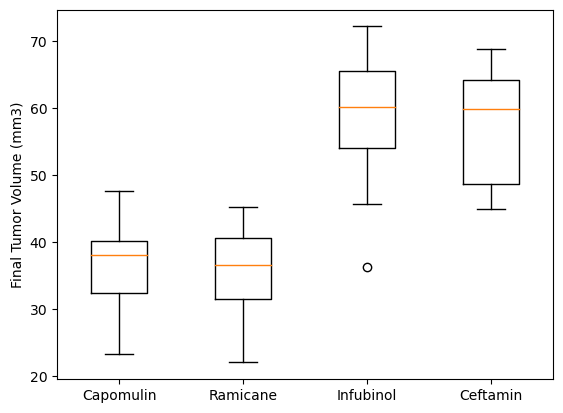

In [317]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create lists of the Tumor Volume for each Drug Regiment
plot= [dr,dr2,dr3, dr4]
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')


ax1.boxplot(plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

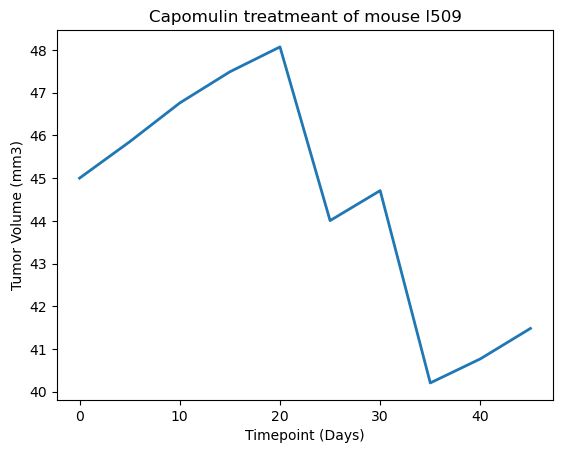

In [320]:
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()

x_axisTP = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

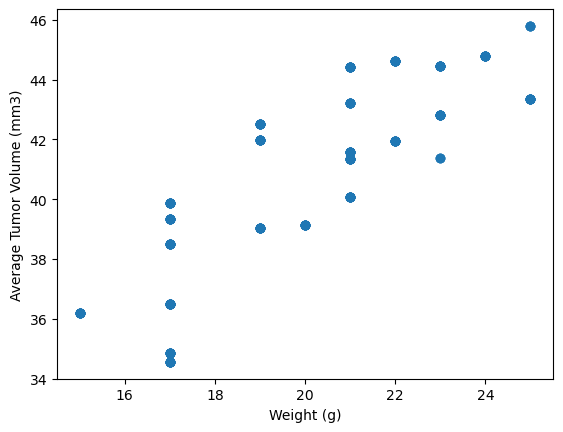

In [349]:
#determine the average observed tumor volume for the entire Capomulin regimen
cap = Capomulin_df.groupby('Mouse ID')
capavg=cap["Tumor Volume (mm3)"].mean()
#put the results in a dataframe
capavg_df= pd.DataFrame(capavg)
#merge the newly created dataframe with the frame filterd by campmoulin created earlier
merge_df3= pd.merge(capavg_df, Capomulin_df, on='Mouse ID', how='left')
merge_df3
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(merge_df3['Weight (g)'],merge_df3['Tumor Volume (mm3)_x'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

In [364]:

# Calculate the correlation coefficient and a linear regression mode
print(f"The correlation  between mouse weight and the average tumor volume is {round(st.pearsonr(merge_df3['Weight (g)'],merge_df3['Tumor Volume (mm3)_x'])[0],2)}")


The correlation  between mouse weight and the average tumor volume is 0.83


In [362]:
# calculating linear regression values using st.linregress() function passing parameters from the merge_df3 dataframe
model=st.linregress(merge_df3['Weight (g)'],merge_df3['Tumor Volume (mm3)_x'])
model

LinregressResult(slope=0.9609669432428362, intercept=21.48982721329954, rvalue=0.8343958614425957, pvalue=6.495737656135933e-61, stderr=0.04203886745939214, intercept_stderr=0.8471050624565543)

In [365]:
# defined slope of regression line using the linregress results
# defined the y-intercept using the linregress results
slope = 0.9609669432428362
intercept = 21.48982721329954

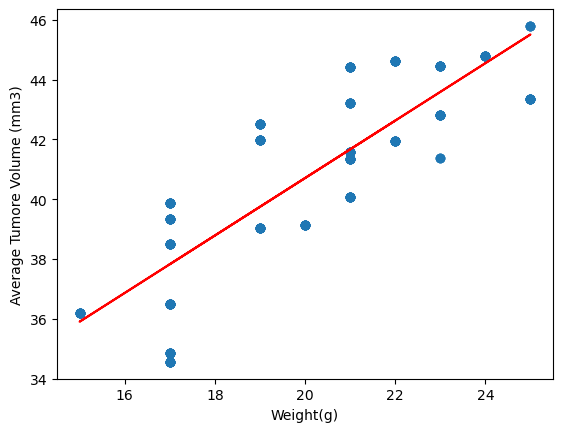

In [367]:
# ploting the regression line

# calculate the the linear line plot list of values
line = slope*(merge_df3['Weight (g)'])+intercept
# create the scatter plot like above
plt.scatter(merge_df3['Weight (g)'],merge_df3['Tumor Volume (mm3)_x'])
# plot the linear regression line which is the averaged line of all the values in red
# i used the .format() function to create a label of the red line using the slope and intercept from above
plt.plot(merge_df3['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()